# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

datos_de_usuario= pd.read_csv("/datasets/megaline_users.csv")
llamadas= pd.read_csv("/datasets/megaline_calls.csv")
sms= pd.read_csv("/datasets/megaline_messages.csv")
web= pd.read_csv("/datasets/megaline_internet.csv")
tarifas= pd.read_csv("/datasets/megaline_plans.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas


print(tarifas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas

print(tarifas.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [5]:
tarifas['gb_per_month_included'] = (tarifas['mb_per_month_included'] / 1024).round()

print(tarifas[['plan_name', 'mb_per_month_included', 'gb_per_month_included']])

  plan_name  mb_per_month_included  gb_per_month_included
0      surf                  15360                   15.0
1  ultimate                  30720                   30.0


[Los megabytes utilizados y proporcionados por el plan fueron convertidos a Gb mas adelante en el proyecto y se redondearon hacia arriba.]

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(datos_de_usuario.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [7]:
# Imprime una muestra de datos para usuarios
print(datos_de_usuario.head())
print(datos_de_usuario.isna().sum())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
datos_de_usuario['reg_date'] = pd.to_datetime(datos_de_usuario['reg_date'], dayfirst=True, format='%Y-%m-%d') 
datos_de_usuario['churn_date'] = pd.to_datetime(datos_de_usuario['churn_date'], dayfirst=True, errors='coerce', format='%Y-%m-%d')
print(datos_de_usuario.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(llamadas.info())
print(llamadas.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [10]:
# Imprime una muestra de datos para las llamadas

print(llamadas.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [11]:
print(llamadas.min())

id             1000_145
user_id            1000
call_date    2018-01-15
duration            0.0
dtype: object


In [12]:
llamadas["duration"]= np.ceil(llamadas["duration"]).astype(int)
print(llamadas.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27         9
1  1000_145     1000  2018-12-27        14
2  1000_247     1000  2018-12-27        15
3  1000_309     1000  2018-12-28         6
4  1000_380     1000  2018-12-30         5


[La duracion se encuentra como un dato flotante en lugar de entero, ademas algunas filas presentan llamadas de duracion de cero segundos, puede que se esten contando las llamadas ]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'], dayfirst=True, format='%Y-%m-%d') 
print(llamadas.dtypes)

id                   object
user_id               int64
call_date    datetime64[ns]
duration              int64
dtype: object


In [14]:
print(llamadas["duration"].min())

0


### Enriquecer los datos

[Se presentaron llamadas con duracion cero, podrian tratarse de llamadas no contestadas, que no se como procese la compañoa, o de llamadas con duracion de pocos segundos que fueron redondeadas a cero]

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(sms.info())
print(sms.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
id              0
user_id         0
message_date    0
dtype: int64


In [16]:
# Imprime una muestra de datos para los mensajes

print(sms.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Si bien no hay datos ausentes las fechas tienen un tipo de formato distito al adecuado]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
sms['message_date'] = pd.to_datetime(sms['message_date'], dayfirst=True, format='%Y-%m-%d') 
print(sms.dtypes)

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(web.info())
print(web.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [19]:
# Imprime una muestra de datos para el tráfico de internet

print(web.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
web['session_date'] = pd.to_datetime(web['session_date'], dayfirst=True, format='%Y-%m-%d') 
print(web.dtypes)

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(tarifas.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [22]:
print(datos_de_usuario.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [23]:
# Calcula el numero de llamadas realizadas por cada usuario al mes. Guarda el resultado.
llamadas['year_month'] = llamadas["call_date"].dt.to_period('M')
usuarios_llamadas= llamadas.groupby(["user_id", "year_month"]).size().reset_index(name='id_count')
print(usuarios_llamadas)

      user_id year_month  id_count
0        1000    2018-12        16
1        1001    2018-08        27
2        1001    2018-09        49
3        1001    2018-10        65
4        1001    2018-11        64
...       ...        ...       ...
2253     1498    2018-12        39
2254     1499    2018-09        41
2255     1499    2018-10        53
2256     1499    2018-11        45
2257     1499    2018-12        65

[2258 rows x 3 columns]


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
llamadas['year_month'] = llamadas["call_date"].dt.to_period('M')
usuarios_minutos= llamadas.groupby(["user_id", "year_month"])["duration"].sum().reset_index(name='duration_sum')
print(usuarios_minutos)

      user_id year_month  duration_sum
0        1000    2018-12           124
1        1001    2018-08           182
2        1001    2018-09           315
3        1001    2018-10           393
4        1001    2018-11           426
...       ...        ...           ...
2253     1498    2018-12           339
2254     1499    2018-09           346
2255     1499    2018-10           385
2256     1499    2018-11           308
2257     1499    2018-12           496

[2258 rows x 3 columns]


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
sms['year_month'] = sms['message_date'].dt.to_period('M')
usuarios_sms= sms.groupby(["user_id", "year_month"]).size().reset_index(name='message_count')
print(usuarios_sms)

      user_id year_month  message_count
0        1000    2018-12             11
1        1001    2018-08             30
2        1001    2018-09             44
3        1001    2018-10             53
4        1001    2018-11             36
...       ...        ...            ...
1801     1496    2018-09             21
1802     1496    2018-10             18
1803     1496    2018-11             13
1804     1496    2018-12             11
1805     1497    2018-12             50

[1806 rows x 3 columns]


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
web['year_month'] = web['session_date'].dt.to_period('M')
usuarios_web= web.groupby(["user_id", 'year_month'])["mb_used"].sum().reset_index(name='mb_used_sum')

print(usuarios_web)


      user_id year_month  mb_used_sum
0        1000    2018-12      1901.47
1        1001    2018-08      6919.15
2        1001    2018-09     13314.82
3        1001    2018-10     22330.49
4        1001    2018-11     18504.30
...       ...        ...          ...
2272     1498    2018-12     23137.69
2273     1499    2018-09     12984.76
2274     1499    2018-10     19492.43
2275     1499    2018-11     16813.83
2276     1499    2018-12     22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_stats = pd.merge(usuarios_llamadas, usuarios_minutos,  on=['user_id', 'year_month'], how='outer')
monthly_stats = pd.merge(monthly_stats, usuarios_sms,  on=['user_id', 'year_month'], how='outer')
monthly_stats = pd.merge(monthly_stats, usuarios_web,  on=['user_id', 'year_month'], how='outer')


In [28]:
# Añade la información de la tarifa
monthly_stats = pd.merge(monthly_stats, datos_de_usuario[['user_id', 'plan']], on='user_id', how='left')
monthly_stats.rename(columns={'plan': 'plan_name'}, inplace=True)

print(monthly_stats.head())

   user_id year_month  id_count  duration_sum  message_count  mb_used_sum  \
0     1000    2018-12      16.0         124.0           11.0      1901.47   
1     1001    2018-08      27.0         182.0           30.0      6919.15   
2     1001    2018-09      49.0         315.0           44.0     13314.82   
3     1001    2018-10      65.0         393.0           53.0     22330.49   
4     1001    2018-11      64.0         426.0           36.0     18504.30   

  plan_name  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


In [30]:
monthly_stats = monthly_stats.dropna(subset=["duration_sum"])
monthly_stats["duration_sum"] =monthly_stats["duration_sum"].astype(int)


In [34]:
print(monthly_stats.isna().sum())

user_id            0
year_month         0
id_count          35
duration_sum      35
message_count    487
mb_used_sum       16
plan_name          0
dtype: int64


In [35]:
monthly_stats_nan = monthly_stats[monthly_stats.isna().any(axis=1)]
print(monthly_stats_nan)

      user_id year_month  id_count  duration_sum  message_count  mb_used_sum  \
29       1009    2018-05      71.0         534.0            NaN     20389.40   
30       1009    2018-06     110.0         823.0            NaN     18845.90   
31       1009    2018-07     124.0         880.0            NaN     30421.65   
32       1009    2018-08     109.0         731.0            NaN     24557.52   
33       1009    2018-09     116.0         776.0            NaN     20962.40   
...       ...        ...       ...           ...            ...          ...   
2288     1349    2018-12       NaN           NaN           61.0     13039.91   
2289     1361    2018-05       NaN           NaN            2.0      1519.69   
2290     1482    2018-10       NaN           NaN            2.0          NaN   
2291     1108    2018-12       NaN           NaN            NaN       233.17   
2292     1311    2018-06       NaN           NaN            NaN      1498.83   

     plan_name  
29        surf  
30   

In [36]:
monthly_stats=monthly_stats.fillna(0)
print(monthly_stats.isna().sum())
print(monthly_stats.head(10))

user_id          0
year_month       0
id_count         0
duration_sum     0
message_count    0
mb_used_sum      0
plan_name        0
dtype: int64
   user_id year_month  id_count  duration_sum  message_count  mb_used_sum  \
0     1000    2018-12      16.0         124.0           11.0      1901.47   
1     1001    2018-08      27.0         182.0           30.0      6919.15   
2     1001    2018-09      49.0         315.0           44.0     13314.82   
3     1001    2018-10      65.0         393.0           53.0     22330.49   
4     1001    2018-11      64.0         426.0           36.0     18504.30   
5     1001    2018-12      56.0         412.0           44.0     19369.18   
6     1002    2018-10      11.0          59.0           15.0      6552.01   
7     1002    2018-11      55.0         386.0           32.0     19345.08   
8     1002    2018-12      47.0         384.0           41.0     14396.24   
9     1003    2018-12     149.0        1104.0           50.0     27044.14   

  plan

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [37]:
monthly_stats = pd.merge(monthly_stats, tarifas, on='plan_name', how='outer')
print(monthly_stats.head())


   user_id year_month  id_count  duration_sum  message_count  mb_used_sum  \
0     1000    2018-12      16.0         124.0           11.0      1901.47   
1     1006    2018-11       2.0          10.0           15.0      2068.37   
2     1006    2018-12       9.0          59.0          139.0     32118.82   
3     1008    2018-10      71.0         476.0           21.0     17106.99   
4     1008    2018-11      63.0         446.0           37.0     23676.72   

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1  ultimate               1000                  30720              3000   
2  ultimate               1000                  30720              3000   
3  ultimate               1000                  30720              3000   
4  ultimate               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               70 

In [38]:
monthly_stats['extra_minutes'] = monthly_stats['duration_sum'] - monthly_stats['minutes_included']
monthly_stats['extra_minutes'] = monthly_stats['extra_minutes'].clip(lower=0)  # Si es negativo, ponerlo en 0
monthly_stats['cost_extra_minutes'] = monthly_stats['extra_minutes'] * monthly_stats['usd_per_minute']

# Calcular SMS extra (si message_count supera los SMS incluidos)
monthly_stats['extra_messages'] = monthly_stats['message_count'] - monthly_stats['messages_included']
monthly_stats['extra_messages'] = monthly_stats['extra_messages'].clip(lower=0)
monthly_stats['cost_extra_messages'] = monthly_stats['extra_messages'] * monthly_stats['usd_per_message']

# Calcular datos extra en GB (si mb_used_sum supera los MB incluidos)
monthly_stats['extra_mb'] = monthly_stats['mb_used_sum'] - monthly_stats['mb_per_month_included']
monthly_stats['extra_mb'] = monthly_stats['extra_mb'].clip(lower=0)


In [39]:
print(monthly_stats['extra_mb'].isna().sum())

0


In [40]:
monthly_stats['extra_mb']=monthly_stats['extra_mb'].fillna(0)
print(monthly_stats['extra_mb'].isna().sum())

0


In [41]:
monthly_stats['extra_gb'] = (monthly_stats['extra_mb'] / 1024).apply(lambda x: int(x) if x == int(x) else int(x) + 1)  # Redondeo hacia arriba
monthly_stats['cost_extra_data'] = monthly_stats['extra_gb'] * monthly_stats['usd_per_gb']

# Calcular el total de costos extra
monthly_stats['total_extra_cost'] = (
    monthly_stats['cost_extra_minutes'] +
    monthly_stats['cost_extra_messages'] +
    monthly_stats['cost_extra_data'])

In [42]:
monthly_stats['total_payment'] = monthly_stats['usd_monthly_pay'] + monthly_stats['total_extra_cost']
print(monthly_stats.head(10))

   user_id year_month  id_count  duration_sum  message_count  mb_used_sum  \
0     1000    2018-12      16.0         124.0           11.0      1901.47   
1     1006    2018-11       2.0          10.0           15.0      2068.37   
2     1006    2018-12       9.0          59.0          139.0     32118.82   
3     1008    2018-10      71.0         476.0           21.0     17106.99   
4     1008    2018-11      63.0         446.0           37.0     23676.72   
5     1008    2018-12      85.0         634.0           26.0     14689.33   
6     1011    2018-06      19.0         118.0           21.0      6685.11   
7     1011    2018-07      63.0         499.0           53.0     21046.41   
8     1011    2018-08      61.0         486.0           54.0     21099.37   
9     1011    2018-09      73.0         484.0           60.0     16638.46   

  plan_name  messages_included  mb_per_month_included  minutes_included  ...  \
0  ultimate               1000                  30720              3000 

In [43]:

print(monthly_stats.isna().sum())

user_id                  0
year_month               0
id_count                 0
duration_sum             0
message_count            0
mb_used_sum              0
plan_name                0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
extra_minutes            0
cost_extra_minutes       0
extra_messages           0
cost_extra_messages      0
extra_mb                 0
extra_gb                 0
cost_extra_data          0
total_extra_cost         0
total_payment            0
dtype: int64


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [44]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.


llamadas_surf = monthly_stats[monthly_stats['plan_name'] == 'surf']
plan_surf = llamadas_surf.groupby(["year_month", "plan_name"])['id_count'].mean().reset_index()
llamadas_ultimate = monthly_stats[monthly_stats['plan_name'] == 'ultimate']
plan_ultimate = llamadas_ultimate.groupby(["year_month", "plan_name"])['id_count'].mean().reset_index()


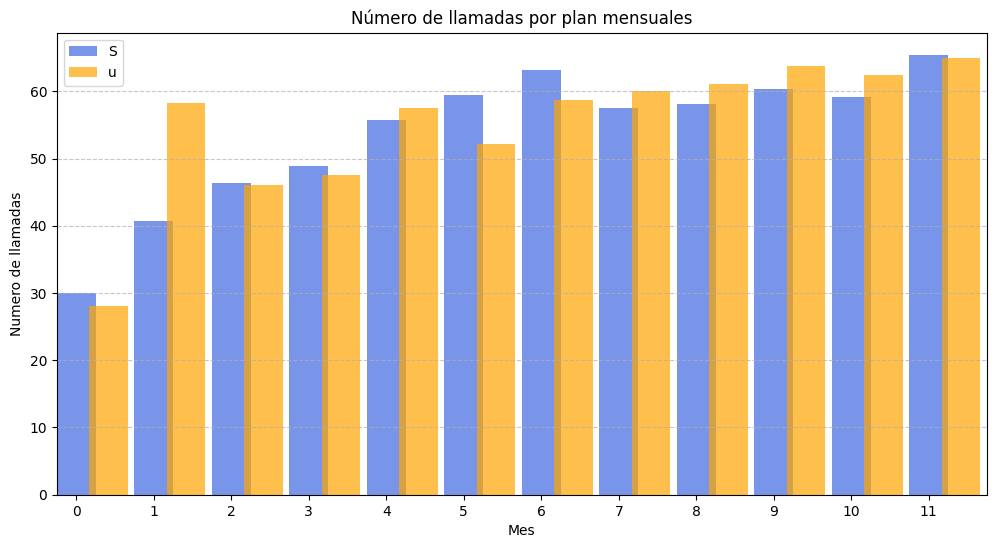

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
plan_surf.plot.bar(ax=ax, color='royalblue', xlabel='Mes', ylabel='Numero de llamadas', title='Número de llamadas por plan mensuales', rot=0, alpha=0.7, align='center')
plan_ultimate.plot.bar(ax=ax, color='orange', xlabel='Mes', ylabel='Numero de llamadas', title='Número de llamadas por plan mensuales', rot=0, alpha=0.7, align='edge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend("Surf" "Ultimate")
plt.show()

In [46]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plan_surf_min = monthly_stats[monthly_stats['plan_name'] == 'surf']
minutos_llamadas_surf = plan_surf_min.groupby("year_month")['duration_sum'].mean().reset_index()
plan_ultimate_min = monthly_stats[monthly_stats['plan_name'] == 'ultimate']
minutos_llamadas_ultimate = plan_ultimate_min.groupby("year_month")['duration_sum'].mean().reset_index()



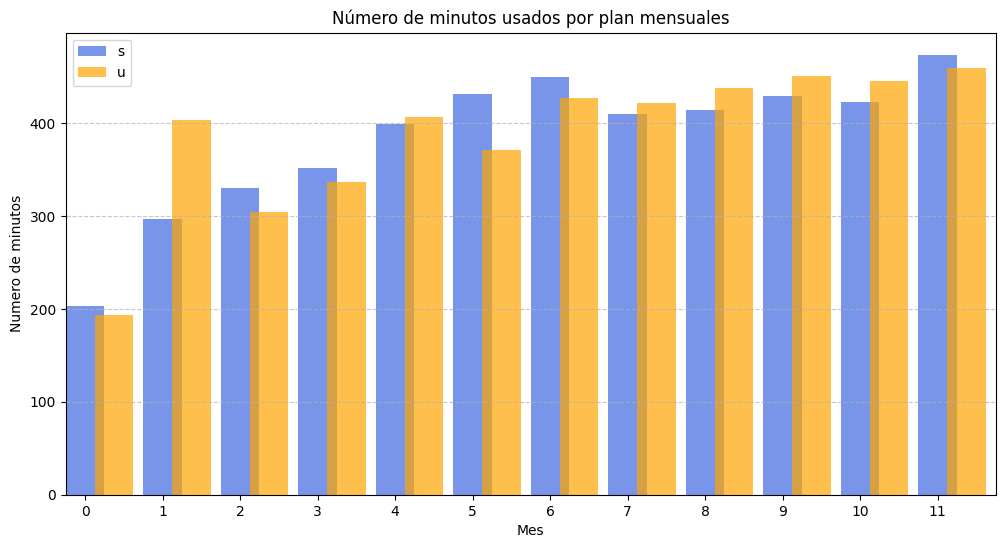

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
minutos_llamadas_surf.plot.bar(ax=ax, color='royalblue', xlabel='Mes', ylabel='Numero de minutos', title='Número de minutos usados por plan mensuales', rot=0, alpha=0.7, align='center', label="Surf")
minutos_llamadas_ultimate.plot.bar(ax=ax, color='orange', xlabel='Mes', ylabel='Numero de minutos', title='Número de minutos usados por plan mensuales', rot=0, alpha=0.7, align='edge', label="Ultimate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend("surf" "Ultimate")
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [48]:
# Calcula la media y la varianza de la duración mensual de llamadas.

llamadas_mensuales= monthly_stats.groupby("year_month")['duration_sum']
media= llamadas_mensuales.mean()
print(media)
varianza= llamadas_mensuales.var()
print(varianza)

year_month
2018-01    196.666667
2018-02    343.437500
2018-03    321.171429
2018-04    347.197183
2018-05    401.405660
2018-06    411.604167
2018-07    442.472222
2018-08    413.562232
2018-09    421.378571
2018-10    436.221574
2018-11    430.100000
2018-12    469.091684
Freq: M, Name: duration_sum, dtype: float64
year_month
2018-01    13135.866667
2018-02    61567.329167
2018-03    43378.499160
2018-04    45620.531992
2018-05    54950.510063
2018-06    45086.240822
2018-07    64525.781347
2018-08    53926.747188
2018-09    49735.899181
2018-10    52829.190527
2018-11    54351.738142
2018-12    63180.258670
Freq: M, Name: duration_sum, dtype: float64


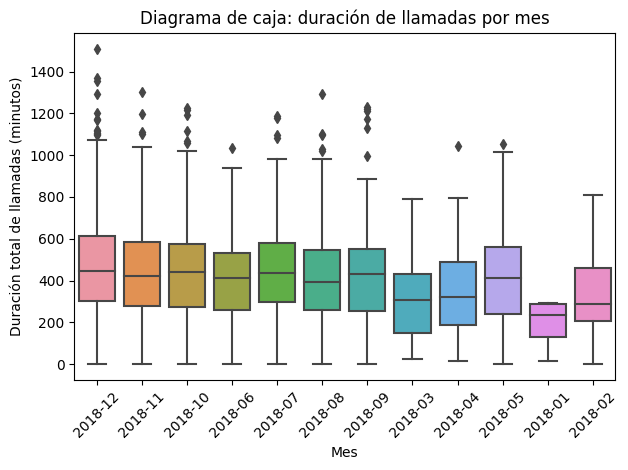

In [49]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=monthly_stats, x='year_month', y='duration_sum')
plt.title('Diagrama de caja: duración de llamadas por mes')
plt.xlabel('Mes')
plt.ylabel('Duración total de llamadas (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

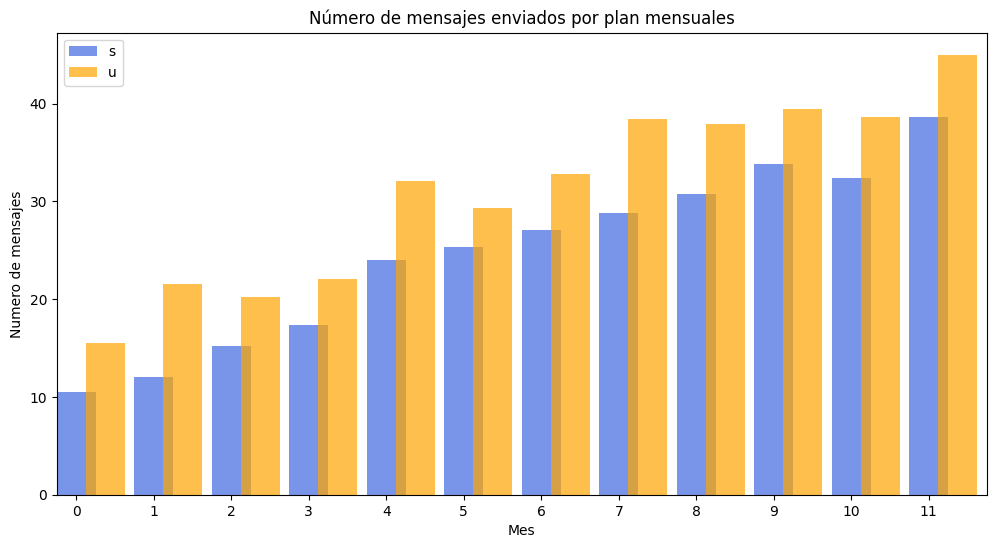

In [50]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plan_surf_sms = monthly_stats[monthly_stats['plan_name'] == 'surf']
mensajes_surf =plan_surf_sms.groupby("year_month")['message_count'].mean().reset_index()
plan_ultimate_sms = monthly_stats[monthly_stats['plan_name'] == 'ultimate']
mensajes_ultimate = plan_ultimate_sms.groupby("year_month")['message_count'].mean().reset_index()


fig, ax = plt.subplots(figsize=(12, 6))
mensajes_surf.plot.bar(ax=ax, color='royalblue', xlabel='Mes', ylabel='Numero de mensajes', title='Número de mensajes enviados por plan mensuales', rot=0, alpha=0.7, align='center', label="Surf")
mensajes_ultimate.plot.bar(ax=ax, color='orange', xlabel='Mes', ylabel='Numero de mensajes', title='Número de mensajes enviados por plan mensuales', rot=0, alpha=0.7, align='edge', label="Ultimate")
plt.legend("surf" "Ultimate")
plt.show()

In [51]:
monthly_stats['gb_used_sum'] = (monthly_stats['mb_used_sum'] / 1024).round()

print(monthly_stats[['plan_name', 'mb_used_sum', 'gb_used_sum']])

     plan_name  mb_used_sum  gb_used_sum
0     ultimate      1901.47          2.0
1     ultimate      2068.37          2.0
2     ultimate     32118.82         31.0
3     ultimate     17106.99         17.0
4     ultimate     23676.72         23.0
...        ...          ...          ...
2288      surf     31088.49         30.0
2289      surf     13093.55         13.0
2290      surf     17128.26         17.0
2291      surf     13039.91         13.0
2292      surf      1519.69          1.0

[2293 rows x 3 columns]


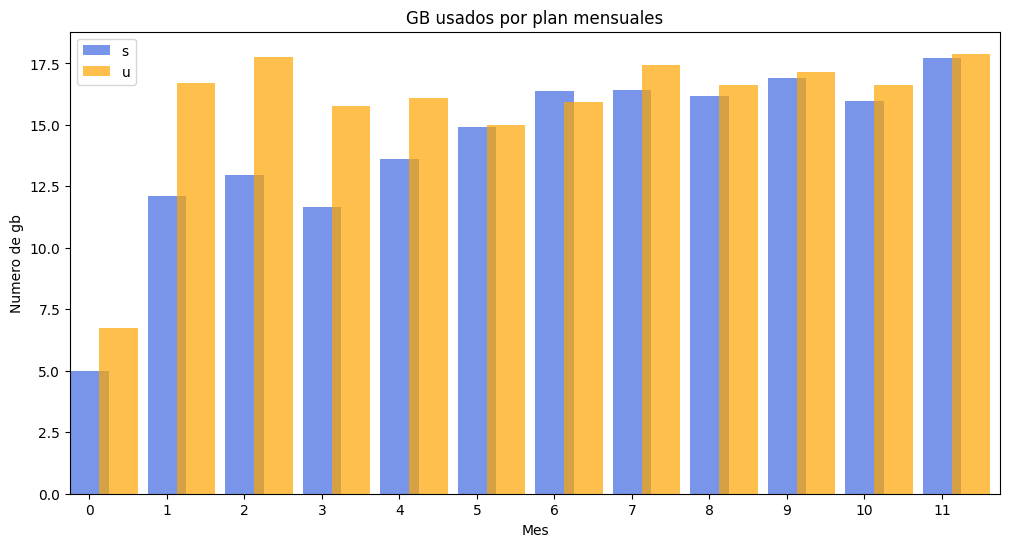

In [52]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

plan_surf_mb = monthly_stats[monthly_stats['plan_name'] == 'surf']
mb_surf =plan_surf_mb.groupby("year_month")['gb_used_sum'].mean().reset_index()
plan_ultimate_mb = monthly_stats[monthly_stats['plan_name'] == 'ultimate']
mb_ultimate = plan_ultimate_mb.groupby("year_month")['gb_used_sum'].mean().reset_index()


fig, ax = plt.subplots(figsize=(12, 6))
mb_surf.plot.bar(ax=ax, color='royalblue', xlabel='Mes', ylabel='Numero de gb', title='GB usados por plan mensuales', rot=0, alpha=0.7, align='center', label="Surf")
mb_ultimate.plot.bar(ax=ax, color='orange', xlabel='Mes', ylabel='Numero de gb', title='GB usados por plan mensuales', rot=0, alpha=0.7, align='edge', label="Ultimate")
plt.legend("surf" "Ultimate")
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

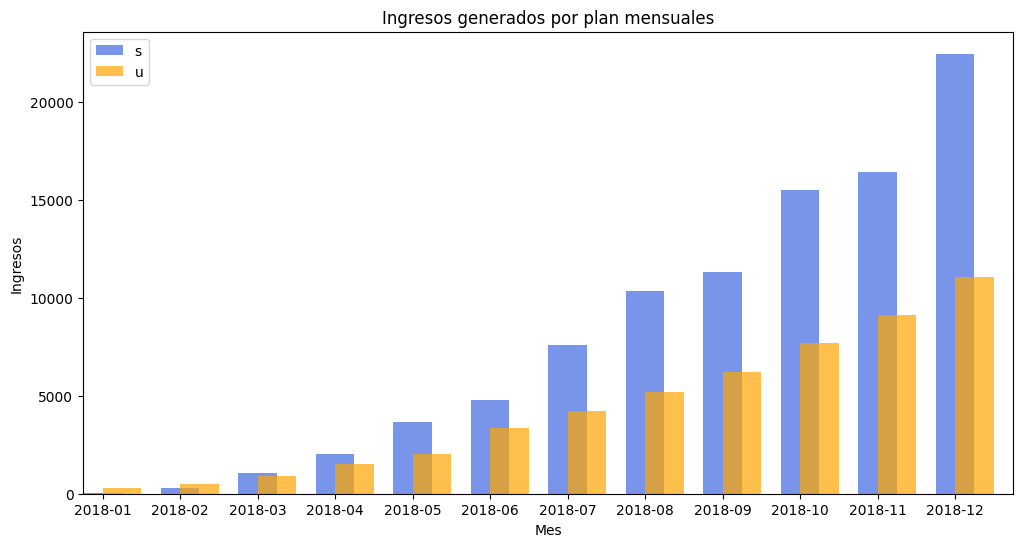

In [53]:
plan_surf_ingresos = monthly_stats[monthly_stats['plan_name'] == 'surf']
ingresos_surf =plan_surf_ingresos.groupby("year_month")['total_payment'].sum()
plan_ultimate_ingresos = monthly_stats[monthly_stats['plan_name'] == 'ultimate']
ingresos_ultimate = plan_ultimate_ingresos.groupby("year_month")['total_payment'].sum()


fig, ax = plt.subplots(figsize=(12, 6))
ingresos_surf.plot.bar(ax=ax, color='royalblue', xlabel='Mes', ylabel='Ingresos', title='Ingresos generados por plan mensuales', rot=0, alpha=0.7, align='center', label="Surf")
ingresos_ultimate.plot.bar(ax=ax, color='orange', xlabel='Mes', ylabel='Ingresos', title='Ingresos generados por plan mensuales', rot=0, alpha=0.7, align='edge', label="Ultimate")
plt.legend("surf" "Ultimate")
plt.show()

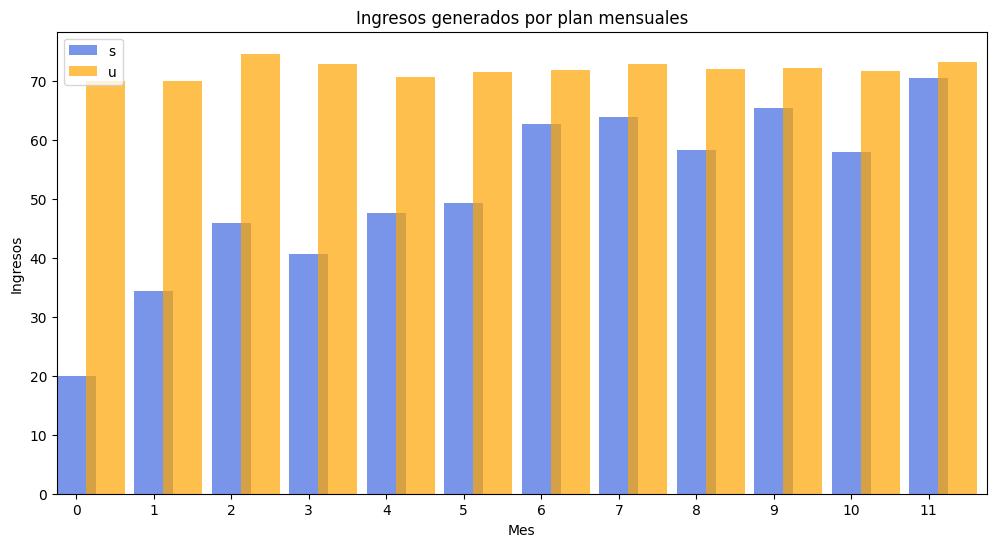

In [54]:
plan_surf_ingresos = monthly_stats[monthly_stats['plan_name'] == 'surf']
ingresos_surf =plan_surf_ingresos.groupby("year_month")['total_payment'].mean().reset_index()
plan_ultimate_ingresos = monthly_stats[monthly_stats['plan_name'] == 'ultimate']
ingresos_ultimate = plan_ultimate_ingresos.groupby("year_month")['total_payment'].mean().reset_index()


fig, ax = plt.subplots(figsize=(12, 6))
ingresos_surf.plot.bar(ax=ax, color='royalblue', xlabel='Mes', ylabel='Ingresos', title='Ingresos generados por plan mensuales', rot=0, alpha=0.7, align='center', label="Surf")
ingresos_ultimate.plot.bar(ax=ax, color='orange', xlabel='Mes', ylabel='Ingresos', title='Ingresos generados por plan mensuales', rot=0, alpha=0.7, align='edge', label="Ultimate")
plt.legend("surf" "Ultimate")
plt.show()

In [55]:
print(plan_surf_ingresos["user_id"].count())

1573


In [56]:
print(plan_ultimate_ingresos["user_id"].count())

720


[Si bien se observa un ingreso promedio mensual por usuario mayor en el plan Ultimate, el ingreso total obtenido por el plan surf es aproximadamente el doble que el ingreso total obtenido del plan ultimate, esto debido a que el plan surf tiene mas del doble de usuarios que el plan ultimate, tambien se observo una tendencia al alza de ingresos promedio en el plan surf conforme avanzamos en el año obteniendo su mayor pico de ingresos en el mes de diciembre, lo que refleja un mayor consumo de ya sea de Mb, llamadas o sms que genera la cantidad de cargos adicionales suficientes como para generar un ingreso promedio comparable al plan ultimate.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Hipótesis nula: No hay diferencia entre los ingresos promedio procedentes de cada plan 
Hipotesis alternativa: Los ingresos promedios procedentes de cada plan]

In [57]:
# Prueba las hipótesis
alpha = 0.05  
ingresos_surf = plan_surf_ingresos["total_payment"]
ingresos_ultimate = plan_ultimate_ingresos["total_payment"]
results = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var = False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue != alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



valor p:  3.1703905481135734e-15
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Hipotesis nula: o hay diferencia entre los ingresos promedios generados por las areas NY y NJ con las del resto de areas
Hipotesis alternativa: Los ingresos promedios procedentes de las areas NY y NJ es diferente al del resto de areas ]

In [58]:
split_1 = datos_de_usuario['city'].str.split(',', expand=True)


split_2 = split_1[1].str.strip().str.split(' ', expand=True)

datos_de_usuario['city'] = split_1[0]
datos_de_usuario['area'] = split_2[0]
datos_de_usuario['zone_type'] = split_2[1]


In [59]:
print(datos_de_usuario.head())

   user_id first_name  last_name  age                           city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise   
3     1003   Reynaldo    Jenkins   52                          Tulsa   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue   

    reg_date      plan churn_date area zone_type  
0 2018-12-24  ultimate        NaT   GA       MSA  
1 2018-08-13      surf        NaT   WA       MSA  
2 2018-10-21      surf        NaT   NV       MSA  
3 2018-01-28      surf        NaT   OK       MSA  
4 2018-05-23      surf        NaT   WA       MSA  


In [60]:
# Prueba las hipótesis
monthly_stats = monthly_stats.merge( datos_de_usuario[['user_id', 'area']], on='user_id', how='outer')
print(monthly_stats.head())



   user_id year_month  id_count  duration_sum  message_count  mb_used_sum  \
0     1000    2018-12      16.0         124.0           11.0      1901.47   
1     1006    2018-11       2.0          10.0           15.0      2068.37   
2     1006    2018-12       9.0          59.0          139.0     32118.82   
3     1008    2018-10      71.0         476.0           21.0     17106.99   
4     1008    2018-11      63.0         446.0           37.0     23676.72   

  plan_name  messages_included  mb_per_month_included  minutes_included  ...  \
0  ultimate             1000.0                30720.0            3000.0  ...   
1  ultimate             1000.0                30720.0            3000.0  ...   
2  ultimate             1000.0                30720.0            3000.0  ...   
3  ultimate             1000.0                30720.0            3000.0  ...   
4  ultimate             1000.0                30720.0            3000.0  ...   

   cost_extra_minutes  extra_messages  cost_extra_messag

In [61]:
print(monthly_stats["area"].unique())

['GA' 'CA' 'FL' 'OH' 'TN' 'TX' 'PA-NJ-DE-MD' 'IL-IN-WI' 'NY-NJ-PA' 'AL'
 'OK' 'CO' 'WA' 'NV' 'IN' 'SC' 'NC-SC' 'AZ' 'MI' 'CT' 'OH-KY-IN' 'VA-NC'
 'KY-IN' 'VA' 'MO-IL' 'MN-WI' 'LA' 'TN-MS-AR' 'PA' 'DC-VA-MD-WV' 'UT'
 'OR-WA' 'MA-NH' 'NE-IA' 'NM' 'NY' 'RI-MA' 'HI' 'MD' 'WI' 'MO-KS' 'NC']


In [62]:
areas=["NY","NJ", 'NY-NJ-PA']
plan_surf_ingresos = monthly_stats[monthly_stats['area'].isin(areas)]


ingresos_surf_NY_NJ = plan_surf_ingresos["total_payment"]

ingresos_surf_promedio= ingresos_surf_NY_NJ.mean()
# Filtrar los datos para plan_ultimate (todas las áreas que NO sean NY o NJ)
plan_ultimate_ingresos = monthly_stats[~monthly_stats['area'].isin(areas)]

# Calcular el ingreso promedio para esas otras áreas
ingresos_ultimate_Re = plan_ultimate_ingresos["total_payment"]
ingresos_ultimate_promedio= ingresos_ultimate_Re.mean()
print("Ingresos promedio NY y NJ", ingresos_surf_promedio)
print("Ingresos promedio del resto de areas", ingresos_ultimate_promedio)
print(ingresos_surf_NY_NJ.head())
print(ingresos_ultimate_Re.head())

Ingresos promedio NY y NJ 60.90492610837439
Ingresos promedio del resto de areas 65.09262321144674
30    70.0
31    70.0
32    70.0
33    70.0
34    70.0
Name: total_payment, dtype: float64
0    70.0
1    70.0
2    84.0
3    70.0
4    70.0
Name: total_payment, dtype: float64


In [63]:
print("Valores ausentes en Ny y Nj", ingresos_surf_NY_NJ.isna().sum())
print("Valores ausentes en el resto del pais",ingresos_ultimate_Re.isna().sum())
ingresos_surf_NY_NJ= ingresos_surf_NY_NJ.dropna()
ingresos_ultimate_Re= ingresos_ultimate_Re.dropna()
print(ingresos_ultimate_Re.isna().sum())

Valores ausentes en Ny y Nj 1
Valores ausentes en el resto del pais 9
0


In [64]:
print(ingresos_surf_NY_NJ.count())
print(ingresos_ultimate_Re.count())

406
1887


In [65]:
alpha = 0.05  
results_area = st.ttest_ind(ingresos_surf_NY_NJ, ingresos_ultimate_Re, equal_var = False) # realizar una prueba

print('valor p: ', results_area.pvalue) # extraer el valor p

if results_area.pvalue != alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  0.0902061652931304
Rechazamos la hipótesis nula


## Conclusión general
Se observo que independientemente del plan, la cantidad de Mb, llamadas y SMS eran similares, lo que producia bastantes cargos adicionales en el plan Surf, si bien se observo un mayor ingreso promedio en el plan Ultimate, y la prueba de hipotesis demostro que los ingresos promedio son significativamente diferente, la considerable cantidad de cargos extra y la gran cantidad de usuarios del plan Surf, que duplica la cantidad de usurarios con el plan Ultimate, fue suficiete como para obtener un ingreso total con el plan Surf de aproximadamente el doble de los ingresos del plan Ultimate, sugiero promocionar el plan Surf, ya que el bajo costo del plan sera mas atractivo para los potenciales clientes, y los cargos extras generados por el consumo de servicios extra en el plan Surf hara casi tan reditualble el plan Sur como el plan Ultimat, adicionalmente se observo una diferencia significativa en los ingresos promedios por mes generados en las areas de NY y NJ (60.9 dolares) en comparacion al resto de las areas (65 dolares) 